Randomisation Benchmarking -> technique used to obtain the quality of gates 
and operation in quantum system

<ipython-input-5-36da4be58a1e>:38: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  fidelity = np.abs(np.dot(final_statevector, inverse_statevector.conj())) ** 2


     ┌─────────────┐┌─────────────┐ ┌────────────┐   ┌────────────┐»
q_0: ┤ Rx(0.85792) ├┤ Ry(0.39148) ├─┤ Rz(2.6942) ├─■─┤ Rx(2.6252) ├»
     └┬────────────┤└┬────────────┤┌┴────────────┤ │ ├────────────┤»
q_1: ─┤ Rx(1.8486) ├─┤ Ry(3.9298) ├┤ Rz(0.74803) ├─■─┤ Rx(4.0151) ├»
      └────────────┘ └────────────┘└─────────────┘   └────────────┘»
c: 2/══════════════════════════════════════════════════════════════»
                                                                   »
«     ┌────────────┐┌────────────┐    ┌────────────┐┌────────────┐»
«q_0: ┤ Ry(2.0002) ├┤ Rz(4.3036) ├─■──┤ Rx(1.0571) ├┤ Ry(5.4404) ├»
«     ├────────────┤├────────────┤ │ ┌┴────────────┤├───────────┬┘»
«q_1: ┤ Ry(5.2638) ├┤ Rz(5.2319) ├─■─┤ Rx(0.14513) ├┤ Ry(5.319) ├─»
«     └────────────┘└────────────┘   └─────────────┘└───────────┘ »
«c: 2/════════════════════════════════════════════════════════════»
«                                                                 »
«      ┌────────────┐   ┌─────────────┐ ┌

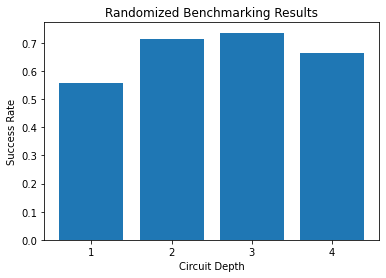

In [5]:
import numpy as np
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Generate a random quantum circuit
def generate_random_circuit(num_qubits, depth):
    circuit = QuantumCircuit(num_qubits, num_qubits)
    for _ in range(depth):
        for qubit in range(num_qubits):
            circuit.rx(np.random.uniform(0, 2 * np.pi), qubit)
            circuit.ry(np.random.uniform(0, 2 * np.pi), qubit)
            circuit.rz(np.random.uniform(0, 2 * np.pi), qubit)
        for qubit in range(num_qubits - 1):
            circuit.cz(qubit, qubit + 1)
    return circuit

# Perform randomized benchmarking
def randomized_benchmarking(num_qubits, depths, num_sequences, shots):
    backend = Aer.get_backend('statevector_simulator')
    results = []
    for depth in depths:
        success_counts = 0
        for _ in range(num_sequences):
            # Generate a random circuit and the corresponding inverse circuit
            circuit = generate_random_circuit(num_qubits, depth)
            inverse_circuit = circuit.inverse()

            # Apply the circuit and obtain the final statevector
            circuit_result = execute(circuit, backend=backend).result()
            final_statevector = circuit_result.get_statevector()

            # Apply the inverse circuit and obtain the final statevector
            inverse_result = execute(inverse_circuit, backend=backend).result()
            inverse_statevector = inverse_result.get_statevector()

            # Calculate the success rate based on state fidelity
            fidelity = np.abs(np.dot(final_statevector, inverse_statevector.conj())) ** 2
            success_counts += shots * (1 - fidelity)

        success_rate = success_counts / (num_sequences * shots)
        results.append(success_rate)
    print(circuit)
    return results

# Example usage
num_qubits = 2
depths = [1, 2, 3, 4]
num_sequences = 100
shots = 1024
results = randomized_benchmarking(num_qubits, depths, num_sequences, shots)
print(results)

plt.bar(depths, results)
plt.xlabel('Circuit Depth')
plt.ylabel('Success Rate')
plt.title('Randomized Benchmarking Results')
plt.xticks(depths)
plt.show()
